In [1]:
from textblob import TextBlob
import codecs
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Preprocessing

In [2]:
f = codecs.open('Shadows_of_Amn_TOB_GD.txt', encoding='latin-1', mode='r')
good_story_text = f.read()
f.close()

In [3]:
good_story_text = good_story_text.replace("\r\n", " ").replace("\'", "'").replace("=", "")

In [5]:
bad_story = codecs.open('BGSOAEV.txt', encoding='latin-1', mode='r')
bad_story_text = bad_story.read()
bad_story.close()

In [6]:
bad_story_text = bad_story_text.replace("\r\n", " ").replace("\'", "'").replace("=", "")

First step for this process is to get the data in and cleaned up, the data had some weird coding that codecs could deal with whereas opening files normally did not fit as well.

# TextBlob Sentiment Analysis

In [7]:

good_blob = TextBlob(good_story_text)
evil_blob = TextBlob(bad_story_text)

First thing to try was TextBlob since it has sentiment analysis in the object itself and can easily separate by sentences. Since the goal is to see the overall sentiment of these two different takes on the same story, I thought this would be a great way to set up the data. TextBlob also has a decent tokenizer which allows for it to separate the sentences.

In [8]:
good_sentiment = [sentence.sentiment.polarity for sentence in good_blob.sentences]
evil_sentiment = [sentence.sentiment.polarity for sentence in evil_blob.sentences]

In [9]:
good_sentiment_accruement = []
evil_sentiment_accruement = []
good_score = 0
evil_score = 0
for sentiment in good_sentiment:
    good_score += sentiment
    good_sentiment_accruement.append(good_score)
for sentiment in evil_sentiment:
    evil_score += sentiment
    evil_sentiment_accruement.append(evil_score)

In [10]:
len(evil_sentiment)

14000

In [11]:
len(good_sentiment)

24500

The two stories that traverse the same time and direction but just with different intent have greatly varying lengths of dialogue. This is something that I did not really understand how to correct and decided to just allow the varying of lengths.

In [12]:
evil_sentimet = np.asarray(evil_sentiment)
good_sentiment = np.asarray(good_sentiment)
good_sentiment_accruement = np.asarray(good_sentiment_accruement)
evil_sentiment_accruement = np.asarray(evil_sentiment_accruement)

In [13]:
evil_sentiment_accruement_norm = evil_sentiment_accruement/max(evil_sentiment_accruement)
good_sentiment_accruement_norm = good_sentiment_accruement/max(good_sentiment_accruement)

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


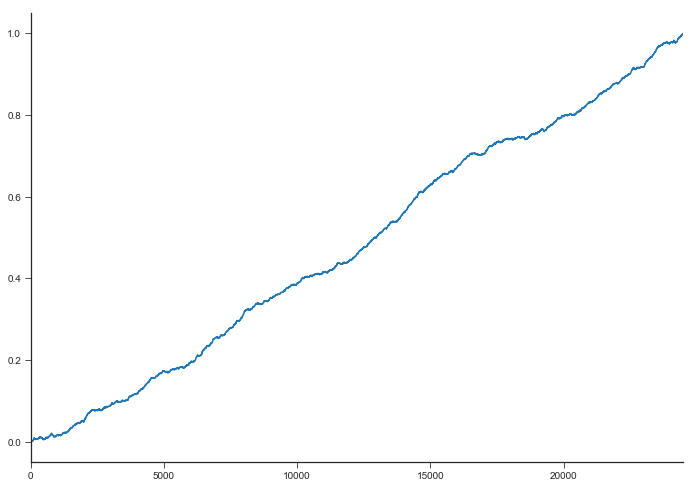

In [14]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=good_sentiment_accruement_norm, ax=ax)    
sns.despine()

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


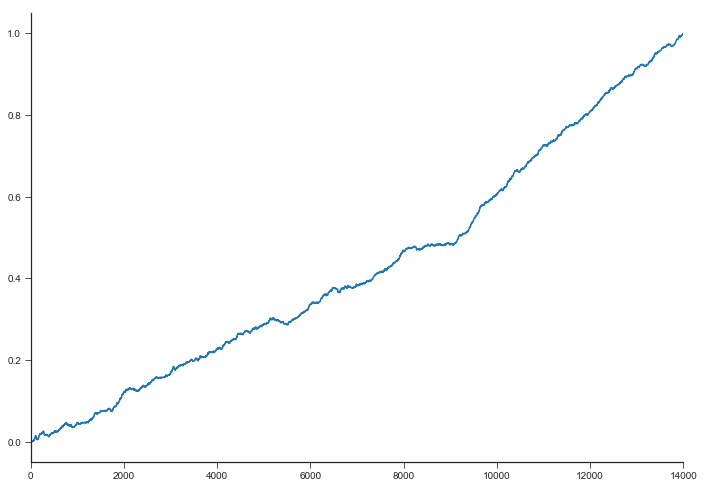

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=evil_sentiment_accruement_norm, ax=ax)    
sns.despine()

Well, first goal of seeing the sentiment throughout the story gave something that looked more like a cdf than an actual story. It seems Textblob's sentiment analysis believes a lot of the sentiment of both stories is overall positive in each sentence, which is surprising since there are many comments about murder in the evil story.

Since textblob also has subjectivity sentiment as well, I thought it would be good to apply the same work on it and see if there may be a story to tell about how subjective portions of the sotry are compared to others.

## Textblob Sentiment Analysis Subjectivity

In [16]:
good_sentiment_s = [sentence.sentiment.subjectivity for sentence in good_blob.sentences]
evil_sentiment_s = [sentence.sentiment.subjectivity for sentence in evil_blob.sentences]

In [17]:
good_sentiment_s_accruement = []
evil_sentiment_s_accruement = []
good_s_score = 0
evil_s_score = 0
for sentiment in good_sentiment_s:
    good_s_score += sentiment
    good_sentiment_s_accruement.append(good_s_score)
for sentiment in evil_sentiment_s:
    evil_s_score += sentiment
    evil_sentiment_s_accruement.append(evil_s_score)

In [18]:
evil_sentimet_s = np.asarray(evil_sentiment_s)
good_sentiment_s = np.asarray(good_sentiment_s)
good_sentiment_s_accruement = np.asarray(good_sentiment_s_accruement)
evil_sentiment_s_accruement = np.asarray(evil_sentiment_s_accruement)

evil_sentiment_s_accruement_norm = evil_sentiment_s_accruement/max(evil_sentiment_s_accruement)
good_sentiment_s_accruement_norm = good_sentiment_s_accruement/max(good_sentiment_s_accruement)

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


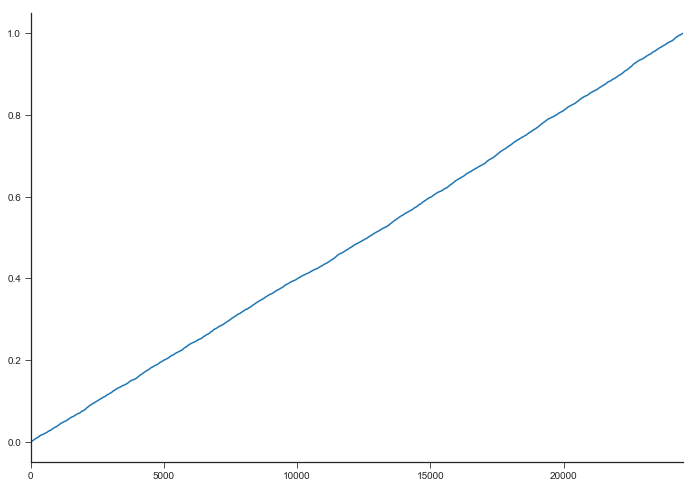

In [19]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=good_sentiment_s_accruement_norm, ax=ax)    
sns.despine()

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


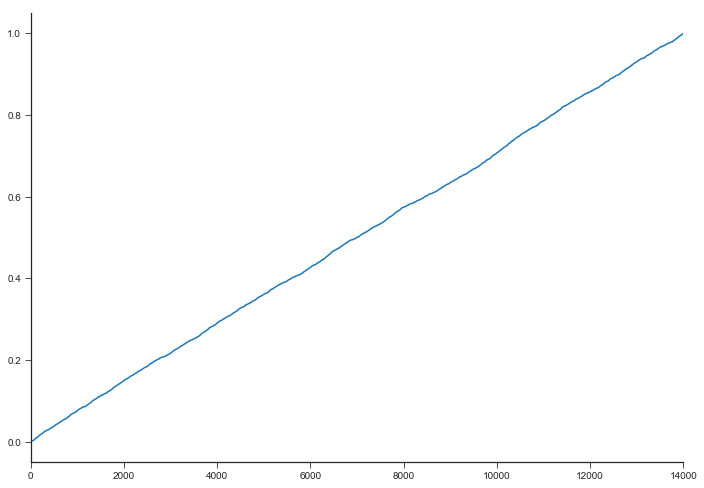

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=evil_sentiment_s_accruement_norm, ax=ax)    
sns.despine()

And... they're both linear. This gives almost no real insight other than the growth is relatively linear in the story.

## Reviewing results from textblob sentiment analysis

In [69]:
evil_blob.sentences[80]

Sentence("Jaheira is what I am called, as you should well know.")

In [70]:
evil_blob.sentences[80].sentiment.polarity

0.0

In [71]:
evil_blob.sentences[80].sentiment.subjectivity

0.0

I feel like this example sentence is a great indicator of where there may be things missing in the sentiment analysis given by textblob. The retort seems more subjective than 0 and it being considered a straight 0 in polarity is a little surprising as well.

In [73]:
for sentence in evil_blob.sentences[0:11]:
    print(sentence, sentence.sentiment.polarity)
    print('\n')

Portions copyright ( 2000 by BioWare Corp. All rights reserved. 0.0


Trademarks are property of their respective owners. 0.0


Introduction In my opinion, the biggest improvements in Baldur's Gate II: Shadows of Amn are the well developed personalities of the characters who can join your party, and the better developed main plot and generally interesting and involved side quests. 0.2733333333333333


I thought it would be worthwhile to recreate the game's story in written form, in the game's own words. 0.07499999999999998


All of the dialog in the following is taken almost unchanged directly from the game itself, as well as some of the other material. -0.10625000000000001


In order to create a full story, I did have to invent a lead character, as well as pick a particular path through the game. 0.03888888888888886


I am assuming you have already played the game itself, but you might want to read this to experience the story again, or to hear from characters you chose not to include

I don't exactly agree with the sentiments that textblob gives each of these sentences. I think it may be better to use another source for sentiment in this problem.

# Creating dataframe to play with for next sentiment work

In [27]:
story_data = {'sentence': [str(sentence) for sentence in good_blob.sentences],
              'story_type': ['good' for sentence in good_blob.sentences],
              'subjectivity_tb': good_sentiment_s, 'polarity_tb': good_sentiment, 
              'sentence_count' : [i+1 for i in range(len(good_blob.sentences))]}

In [26]:
story_data_evil = {'sentence': [str(sentence) for sentence in evil_blob.sentences],
              'story_type': ['evil' for sentence in evil_blob.sentences],
              'subjectivity_tb': evil_sentiment_s, 'polarity_tb': evil_sentiment, 
                   'sentence_count' : [i+1 for i in range(len(evil_blob.sentences))]}

In [28]:
story_dataframe_good = pd.DataFrame(data=story_data)
story_dataframe_evil = pd.DataFrame(data=story_data_evil)

In [29]:
frames = [story_dataframe_good, story_dataframe_evil]

In [30]:
story_dataframe = pd.concat(frames)

In [31]:
story_dataframe.head()

,sentence,story_type,subjectivity_tb,polarity_tb,sentence_count
0,"Portions copyright ( 2000, 2001 by BioWare Cor...",good,0.000000,0.000000,1
1,Trademarks are property of their respective ow...,good,0.100000,0.000000,2
2,"Introduction In my opinion, the biggest impro...",good,0.386667,0.273333,3
3,I thought it would be worthwhile to recreate t...,good,0.575000,0.075000,4
4,All of the dialog in the following is taken al...,good,0.318750,-0.106250,5


# Testing VADER sentiment analysis

In [32]:
analyser = SentimentIntensityAnalyzer()

In [38]:
for sentence in story_dataframe['sentence'][0:10]:
    print(sentence + " " + str(analyser.polarity_scores(sentence)))
    print("\n")

Portions copyright ( 2000, 2001 by BioWare Corp. All rights reserved. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Trademarks are property of their respective owners. {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}


Introduction  In my opinion, the biggest improvements in Baldur's Gate II: Shadows of Amn are the well developed personalities of the characters who can join your party, and the better developed main plot and generally interesting and involved side quests. {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9169}


I thought it would be worthwhile to recreate the game's story in written form, in the game's own words. {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.34}


All of the dialog in the following is taken almost unchanged directly from the game itself, as well as some of the other material. {'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'compound': 0.2732}


In order to create a full story, I did have to invent a lead character, as well 

Interesting how most sentiment is tends to think of "good" as positive sentiment, but it does not recognize "evil" as negative sentiment. Anyways, let's take these new values from vader sentiment and see the findings. However, being able to see the negativity, neutrality, and positivity of each sentence better explains what may be causing the overall score that they receive.

In [51]:
negative_scores = pd.Series([analyser.polarity_scores(sentence)['neg'] for sentence in story_dataframe['sentence']])
neutrality_scores = pd.Series([analyser.polarity_scores(sentence)['neu'] for sentence in story_dataframe['sentence']])
positive_scores = pd.Series([analyser.polarity_scores(sentence)['pos'] for sentence in story_dataframe['sentence']])
polarity_vader = pd.Series([analyser.polarity_scores(sentence)['compound'] for sentence in story_dataframe['sentence']])

Using same process as before to show the cumulative sentiment as the stories progress, how positive it gets as the story moves along  or how negative it gets.

In [52]:
story_dataframe['neg'] = negative_scores.values
story_dataframe['neu'] = neutrality_scores.values
story_dataframe['pos'] = positive_scores.values
story_dataframe['polarity_vader'] = polarity_vader.values

In [55]:
good_vader_sent = story_dataframe[story_dataframe.story_type == 'good'].polarity_vader
evil_vader_sent = story_dataframe[story_dataframe.story_type == 'evil'].polarity_vader

In [58]:
good_sentiment_vader_accruement = []
evil_sentiment_vader_accruement = []
good_vader_score = 0
evil_vader_score = 0
for sentiment in good_vader_sent:
    good_vader_score += sentiment
    good_sentiment_vader_accruement.append(good_vader_score)
for sentiment in evil_vader_sent:
    evil_vader_score += sentiment
    evil_sentiment_vader_accruement.append(evil_vader_score)

In [59]:
good_sentiment_vader_accruement = np.asarray(good_sentiment_vader_accruement)
evil_sentiment_vader_accruement = np.asarray(evil_sentiment_vader_accruement)

In [60]:
evil_sentiment_vader_accruement_norm = evil_sentiment_vader_accruement/max(evil_sentiment_vader_accruement)
good_sentiment_vader_accruement_norm = good_sentiment_vader_accruement/max(good_sentiment_vader_accruement)

In [65]:
print("Vader Sentiment vs Textblob Sentiment Totals")
print(evil_sentiment_vader_accruement[-1], evil_sentiment_accruement[-1])
print(good_sentiment_vader_accruement[-1], good_sentiment_accruement[-1])

Vader Sentiment vs Textblob Sentiment Totals
-4.117300000000201 591.8065521538649
152.5433000000044 1034.2835668081966


Quick comparisons of where the sentiment ends for both of these methods. As one can see, how positive the stories get is much more using textblob than vader. Vader seem to have a more moving sentiment considering the evil story actually ends with an overall negative sentiment.

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


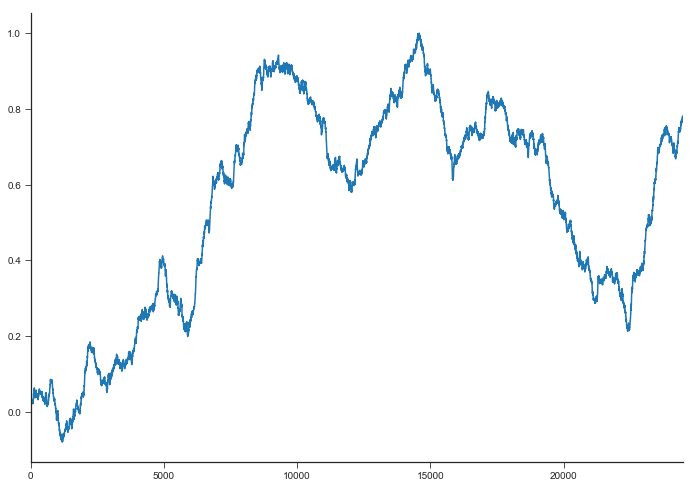

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=good_sentiment_vader_accruement_norm, ax=ax)    
sns.despine()

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


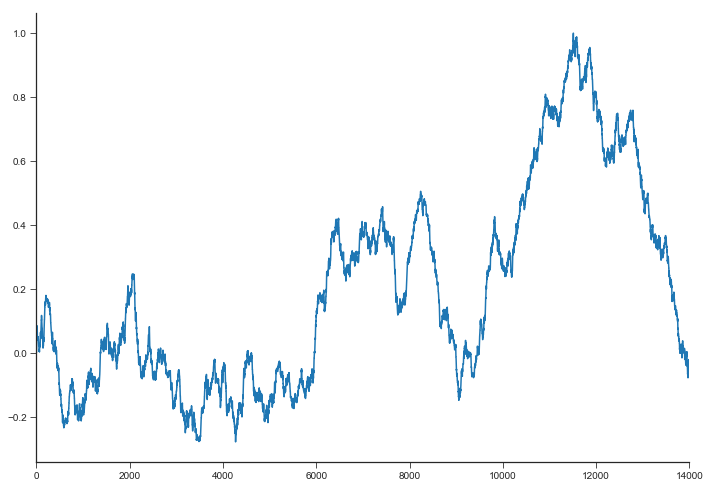

In [67]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.tsplot(data=evil_sentiment_vader_accruement_norm, ax=ax)    
sns.despine()

Very interesting, unlike with textblob's sentiment analysis, vader's sentiment analysis does not gradually increase in positivity. In fact both of these plots actually tell the story of Balders Gate which is incredible. 

With the good graph you can see that what the character is doing and their motives are positive throughout the story. The dips are likely due to conflict up until the large dip which is likely the climax and resulting conflict. After the result of that climax, however, the story raises again in positivity marking the positive resolution

With the evil story you can see that it rummages for a long time in the negative sentiment and then begins rising up in positivity until it hits its maximum positivity value. I'm unsure how the sentiment would climb, likely due to those that are still around in the story don't mind your inclusion and actually think positively of the horrible things one is doing. However, right after it hits its highest mark, the story goes down quickly, likely due to the climactic point of the story followed by the negative resolution to the story.

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


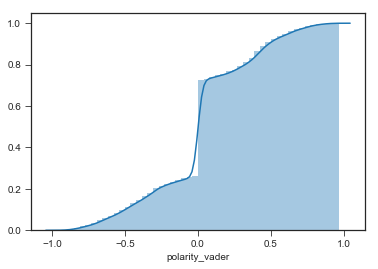

In [74]:
sns.distplot(good_vader_sent,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


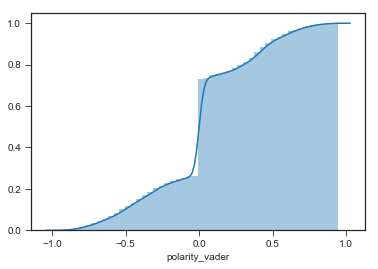

In [75]:
sns.distplot(evil_vader_sent,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


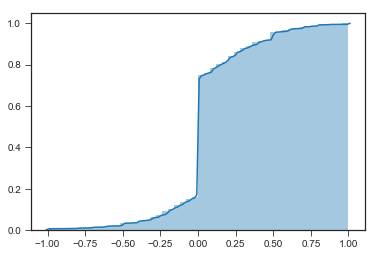

In [76]:
sns.distplot(good_sentiment,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

/Users/johnrumpel/anaconda/envs/nlp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


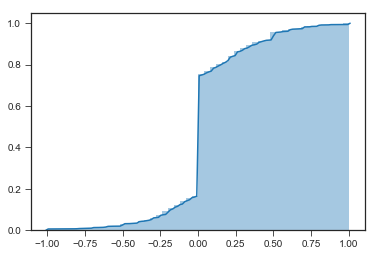

In [77]:
sns.distplot(evil_sentiment,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

As you can see, overall in both sentiment analysis tools have more positive sentiments than negative sentiments, but at least the negative sentiment has a lot more calls in the evil story with vader sentiment analysis.